# Part 1(a)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Define the probability density function of the Laplace distribution
def laplace_pdf(x):
    return (1/2) * np.exp(-np.abs(x))

In [3]:
# Random Walk Metropolis algorithm
def random_walk_metropolis(N, s, x0):
    x = np.zeros(N)
    x[0] = x0  # set the initial value to x0
    for i in range(1, N):
        x_star = x[i-1] + np.random.normal(scale=s)  # propose a new value with mean 0 and std deviation s
        r = laplace_pdf(x_star) / laplace_pdf(x[i-1])  # compute acceptance ratio
        if np.random.uniform() < r:
            x[i] = x_star  # accept the new value
        else:
            x[i] = x[i-1]  # reject the new value and keep the old
    return x

In [4]:
# Parameters
N = 10000  # number of samples to draw
s = 1      # step size
x0 = np.random.normal()  # initial value x0, randomly chosen from a normal distribution

In [5]:
# Run the Random Walk Metropolis algorithm
samples = random_walk_metropolis(N, s, x0)

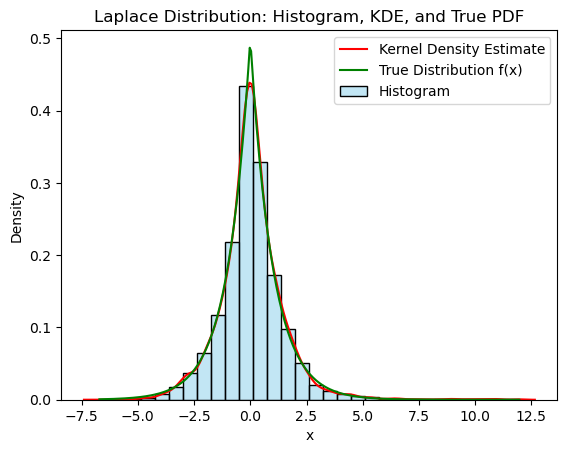

In [7]:
# Plot the histogram
sns.histplot(samples, stat="density", bins=30, color='skyblue', alpha=0.5, label='Histogram')

# Plot the kernel density estimate
sns.kdeplot(samples, color='red', label='Kernel Density Estimate')

# Overlay a graph of f(x)
x_values = np.linspace(min(samples), max(samples), 300)
plt.plot(x_values, laplace_pdf(x_values), color='green', label='True Distribution f(x)')

plt.title('Laplace Distribution: Histogram, KDE, and True PDF')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.show()

In [8]:
# Calculate and display the sample mean and standard deviation
sample_mean = np.mean(samples)
sample_std = np.std(samples)
print(f"Sample Mean: {sample_mean}")
print(f"Sample Standard Deviation: {sample_std}")

Sample Mean: 0.06194112959596048
Sample Standard Deviation: 1.4460375906690646
